In [1]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import numpy as np
import sklearn.manifold as manifold
from sklearn.datasets import make_s_curve, make_swiss_roll
from sklearn.decomposition import PCA

import datafold.dynfold as dfold
import datafold.pcfold as pfold
from datafold.dynfold import LocalRegressionSelection
from datafold.utils.plot import plot_pairwise_eigenvector

## S-curve using Datafold

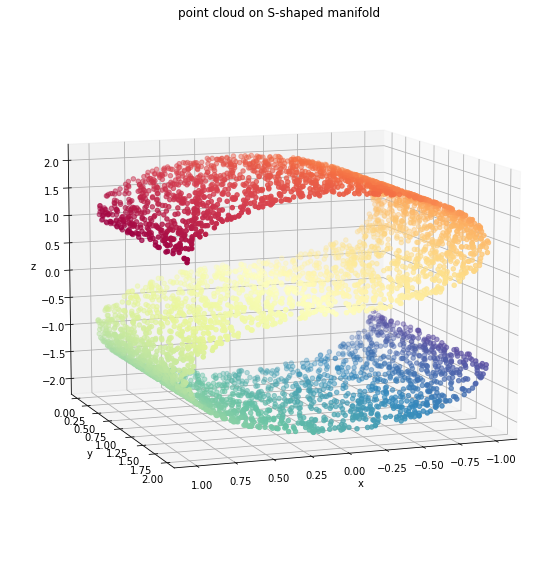

In [2]:
nr_samples = 15000

# reduce number of points for plotting
nr_samples_plot = 5000
idx_plot = np.random.permutation(nr_samples)[0:nr_samples_plot]

# generate point cloud
X, X_color = make_s_curve(nr_samples, random_state=3, noise=0)

# plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    X[idx_plot, 0],
    X[idx_plot, 1],
    X[idx_plot, 2],
    c=X_color[idx_plot],
    cmap=plt.cm.Spectral,
)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("point cloud on S-shaped manifold")
ax.view_init(10, 70)

In [8]:
X_pcm = pfold.PCManifold(X)
X_pcm.optimize_parameters()

print(f"epsilon={X_pcm.kernel.epsilon}, cut-off={X_pcm.cut_off}")

epsilon=0.0017246666403009092, cut-off=0.17824010090529005


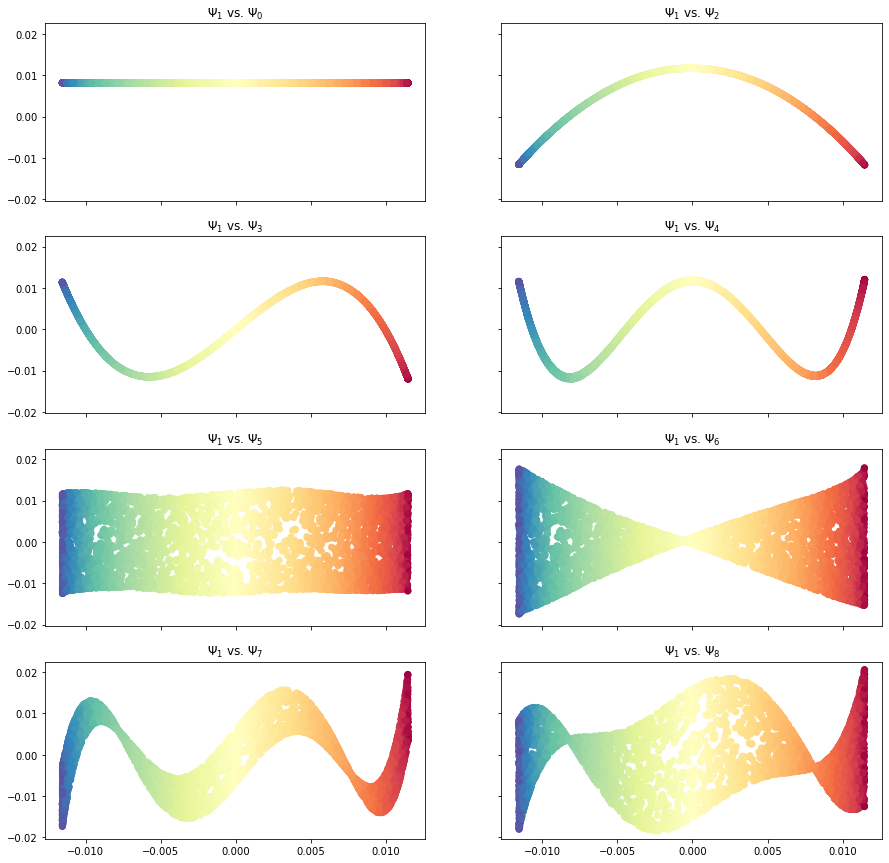

In [9]:
dmap = dfold.DiffusionMaps(
    kernel=pfold.GaussianKernel(epsilon=X_pcm.kernel.epsilon),
    n_eigenpairs=9,
    dist_kwargs=dict(cut_off=X_pcm.cut_off),
)
dmap = dmap.fit(X_pcm)
evecs, evals = dmap.eigenvectors_, dmap.eigenvalues_

plot_pairwise_eigenvector(
    eigenvectors=dmap.eigenvectors_[idx_plot, :],
    n=1,
    fig_params=dict(figsize=[15, 15]),
    scatter_params=dict(cmap=plt.cm.Spectral, c=X_color[idx_plot]),
)

## Swiss roll using Datafold

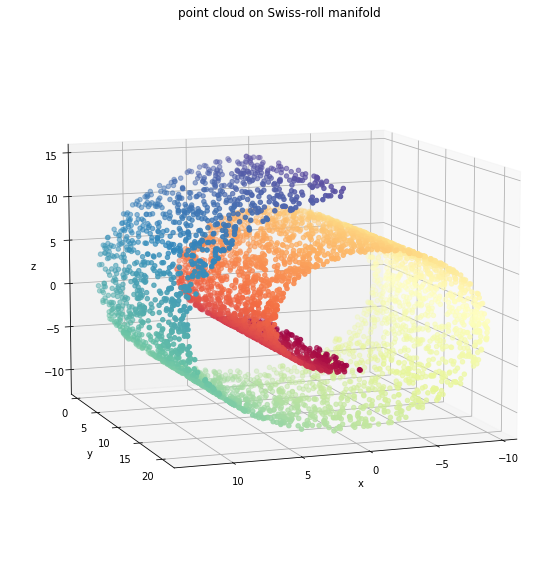

In [12]:
nr_samples = 15000

# reduce number of points for plotting
nr_samples_plot = 5000
idx_plot = np.random.permutation(nr_samples)[0:nr_samples_plot]

# generate point cloud
X, X_color = make_swiss_roll(nr_samples, random_state=3, noise=0)

# plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    X[idx_plot, 0],
    X[idx_plot, 1],
    X[idx_plot, 2],
    c=X_color[idx_plot],
    cmap=plt.cm.Spectral,
)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("point cloud on Swiss-roll manifold")
ax.view_init(10, 70)

In [13]:
X_pcm = pfold.PCManifold(X)
X_pcm.optimize_parameters()

print(f"epsilon={X_pcm.kernel.epsilon}, cut-off={X_pcm.cut_off}")

epsilon=0.16512716079348405, cut-off=1.7440627027524147


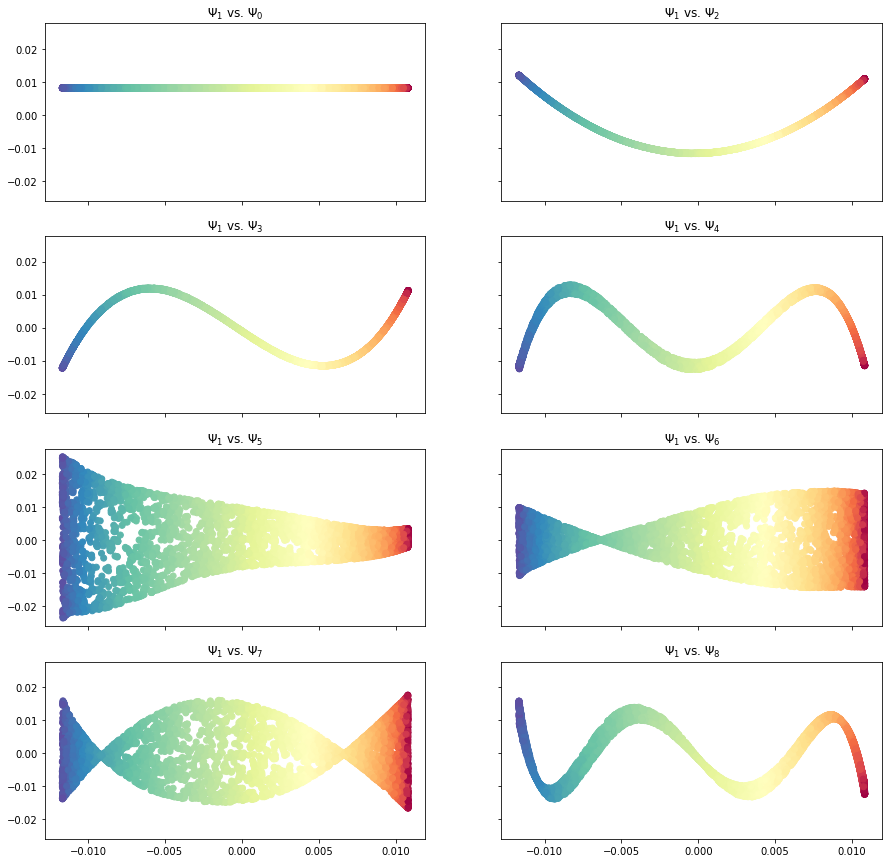

In [14]:
dmap = dfold.DiffusionMaps(
    kernel=pfold.GaussianKernel(epsilon=X_pcm.kernel.epsilon),
    n_eigenpairs=9,
    dist_kwargs=dict(cut_off=X_pcm.cut_off),
)
dmap = dmap.fit(X_pcm)
evecs, evals = dmap.eigenvectors_, dmap.eigenvalues_

plot_pairwise_eigenvector(
    eigenvectors=dmap.eigenvectors_[idx_plot, :],
    n=1,
    fig_params=dict(figsize=[15, 15]),
    scatter_params=dict(cmap=plt.cm.Spectral, c=X_color[idx_plot]),
)